In [2]:
import pandas as pd
df=pd.read_csv('explainlikeimfive2020-2021.csv')
df

FileNotFoundError: [Errno 2] File explainlikeimfive2020-2021.csv does not exist: 'explainlikeimfive2020-2021.csv'

In [48]:
df2=df.dropna(subset=['title'])[['title','selftext']]
df2 #leave it to anaylze later

,title,selftext
0,What are ten things a 21 yr old should have in...,[removed]
1,Superlife,[removed]
2,Guggenheim CIO believes Bitcoin will rise to $...,[removed]
3,Is affiliate marketing a scam/ other alternati...,[removed]
4,MP materials only us rare earth company necess...,MP materials is the only rare earth supplier i...
...,...,...
15690,How will GME affect the stock market?,[removed]
15691,I’d like to learn,[removed]
15692,Would GME actually reach $1000 realistically? ...,[removed]
15693,Invest in Porsche SE or Volkswagen?,I strongly belive in Volkswagens future so tha...


In [49]:
#Take interesting columns
df1=df[['selftext','num_comments','score','title']]

#drop duplicate
duplicate = df1.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
df1=df1.drop_duplicates(subset=['selftext'],keep='first')

#drop those with text=NA
df1=df1.dropna(subset=['selftext'])
#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]

len(df1)

There are 434 duplicated values.


6532

In [50]:
Markov=df1['selftext']

### Convert to lowercase

In [51]:
df1['selftext']=df1['selftext'].str.lower()
df1['selftext']

4        mp materials is the only rare earth supplier i...
10       as the year is coming to a close, we are begin...
12       in light of the weakening u.s. dollar against ...
13       i’m doing day trading in revolut app they use ...
14       out of curiousity i hit google with "fidelity ...
                               ...                        
15653    r/investing mods, i come to share my experienc...
15661    i peak at [dix and gex](https://squeezemetrics...
15667    \*\*i use the 180d/4h chart for most setups. i...
15669    looking into this company as a possible invest...
15689    hi guys, any thoughts on reits? i have been an...
Name: selftext, Length: 6532, dtype: object

### Remove emoji

In [52]:
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode()
    return text

In [53]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_emoji(x))
df1['selftext']

4        mp materials is the only rare earth supplier i...
10       as the year is coming to a close, we are begin...
12       in light of the weakening u.s. dollar against ...
13       im doing day trading in revolut app they use d...
14       out of curiousity i hit google with "fidelity ...
                               ...                        
15653    r/investing mods, i come to share my experienc...
15661    i peak at [dix and gex](https://squeezemetrics...
15667    \*\*i use the 180d/4h chart for most setups. i...
15669    looking into this company as a possible invest...
15689    hi guys, any thoughts on reits? i have been an...
Name: selftext, Length: 6532, dtype: object

### Remove url, punctuation, and special characters

In [54]:
#Using regular expression
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    x = re.sub("[0-9]+", '', x) #remove numbers
    return x

In [55]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_other(x))
df1['selftext']

4        mp materials is the only rare earth supplier i...
10       as the year is coming to a close, we are begin...
12       in light of the weakening u.s. dollar against ...
13       im doing day trading in revolut app they use d...
14       out of curiousity i hit google with "fidelity ...
                               ...                        
15653    r/investing mods, i come to share my experienc...
15661    i peak at [dix and gex](  from time-to-time an...
15667    \*\*i use the d/h chart for most setups. i als...
15669    looking into this company as a possible invest...
15689    hi guys, any thoughts on reits? i have been an...
Name: selftext, Length: 6532, dtype: object

### Remove stopwords

In [56]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))
print(stop_words) #all preloaded stopwords

{"that'll", 'not', 'before', 'by', 'these', 'doesn', 'has', 'doing', 'between', 'they', 'above', 'about', 'on', 'each', 'same', 'ain', "couldn't", 'had', 'been', "shan't", 'does', 'through', 'did', 'weren', 'me', 'theirs', 'how', 'd', "you're", 'more', 'myself', 'didn', 'any', 'mustn', 'yours', 'nor', 'so', 'while', 'from', 'mightn', 'once', 'hasn', 'for', 're', 'you', 'further', 'just', 'm', 'should', 's', 'some', 'won', 'but', 'no', 'shan', 'out', 'such', 'y', 'which', 'yourselves', 'her', 'below', 'when', 'in', 'few', 'it', 'itself', 'an', 'ours', 'than', 'this', 'o', 'yourself', 'was', 'a', 'ourselves', 'only', "you've", 'my', 'off', 'he', 'to', 'again', 'is', 'will', "should've", "needn't", "don't", 'most', 'at', "haven't", 'those', "didn't", "mustn't", 'with', 'own', 'needn', "aren't", 'am', 'who', 'do', 'aren', 'having', 'where', 'hers', 'all', 'into', "you'll", "hasn't", 'shouldn', 'herself', 'here', 'ma', 'are', "she's", 'll', 'i', 'other', 'hadn', 'we', 'and', 'be', "hadn't",

In [57]:
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [58]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
df1['selftext']

4        mp materials rare earth supplier us. rare eart...
10       year coming close, beginning near first kanye ...
12       light weakening u.s. dollar japanese yen, japa...
13       im day trading revolut app use drivewealth (in...
14       curiousity hit google "fidelity mutual fund sp...
                               ...                        
15653    r/investing mods, come share experience donati...
15661    peak [dix gex]( time-to-time currently low. * ...
15667    \*\*i use d/h chart setups. also use rsi, stoc...
15669    looking company possible investment. generally...
15689    hi guys, thoughts reits? analyzing bunch them....
Name: selftext, Length: 6532, dtype: object

In [59]:
spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df1['selftext'] = df1['selftext'].str.replace(char, ' ')
    df1['selftext'] = df1['selftext'].str.split().str.join(" ")
df1['selftext']

4        mp materials rare earth supplier us rare earth...
10       year coming close beginning near first kanye g...
12       light weakening u s dollar japanese yen japane...
13       im day trading revolut app use drivewealth in ...
14       curiousity hit google fidelity mutual fund spl...
                               ...                        
15653    r investing mods come share experience donatin...
15661    peak dix gex time to time currently low dix ge...
15667    i use d h chart setups also use rsi stochastic...
15669    looking company possible investment generally ...
15689    hi guys thoughts reits analyzing bunch them si...
Name: selftext, Length: 6532, dtype: object

In [1]:
df1['selftext'].str.split()

NameError: name 'df1' is not defined

In [ ]:
sent.to_csv('sent_FIRE.csv', mode='a', encoding='utf-8', index=False)

In [ ]:
sentiment_dictionary = {}
for line in open('AFINN-111.txt'):
    word,score = line.split('\t')
    sentiment_dictionary[word] = int(score)

total_score = sum(sentiment_dictionary.get(word, 0) for word in words)


### Check the resulting text to see whatelse we need to clean

In [60]:
df1['selftext'][4]

'mp materials rare earth supplier us rare earth demand likely skyrocket electric vehicles produced neodymium necessary materials involved production electric vehicles stock equivalent investing oil companies first automobiles invented huge growth potential'

### Example of Lemmatization(change rules to rule)

In [61]:
import nltk
#nltk.download('wordnet') #uncommented for 1st time running
from nltk.stem import WordNetLemmatizer

words=df1['selftext'][4].split()
lemmatizer = WordNetLemmatizer()
for word in words:
    print(word + " ---> " + lemmatizer.lemmatize(word))

mp ---> mp
materials ---> material
rare ---> rare
earth ---> earth
supplier ---> supplier
us ---> u
rare ---> rare
earth ---> earth
demand ---> demand
likely ---> likely
skyrocket ---> skyrocket
electric ---> electric
vehicles ---> vehicle
produced ---> produced
neodymium ---> neodymium
necessary ---> necessary
materials ---> material
involved ---> involved
production ---> production
electric ---> electric
vehicles ---> vehicle
stock ---> stock
equivalent ---> equivalent
investing ---> investing
oil ---> oil
companies ---> company
first ---> first
automobiles ---> automobile
invented ---> invented
huge ---> huge
growth ---> growth
potential ---> potential


In [62]:
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [63]:
df1['selftext']= df1['selftext'].str.split().apply(lambda x: lemmatize(x))
df1['selftext'][4]

'mp material rare earth supplier u rare earth demand likely skyrocket electric vehicle produced neodymium necessary material involved production electric vehicle stock equivalent investing oil company first automobile invented huge growth potential'

### Split words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vec=CountVectorizer()
counts=vec.fit_transform(df1['selftext'])
counts=counts.toarray()
count_df=pd.DataFrame(counts,columns=vec.get_feature_names())
big_df=pd.concat((df1,count_df),axis=1)
big_df.head()

,selftext,num_comments,score,title,aa,aaa,aaau,aabb,aaii,aal,...,zuckerbergs,zuckerburg,zuo,zurich,zvknizoci,zvonko,zwi,zyme,zymeworks,zynga
0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mp material rare earth supplier u rare earth d...,22.0,0.0,MP materials only us rare earth company necess...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# List of all words across rows
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
count_words(df1['selftext'])

,words,count
0,stock,6071
1,company,4522
2,year,4383
3,market,4017
4,would,3748
...,...,...
95,this,798
96,trade,788
97,now,782
98,low,780


In [67]:
stop_words.update({'would','k','im','could','also','amp','much','one','like','get','since'})
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
count_df=count_words(df1['selftext'])
count_df.head(30)

,words,count
0,stock,6071
1,company,4522
2,year,4383
3,market,4017
4,share,2759
5,money,2569
6,price,2381
7,time,2296
8,investing,2272
9,know,2089


In [68]:
import plotly.express as px
fig = px.bar(count_df.head(10), x='words', y='count', title="Top 10 words in Financial Independence")
fig.show()

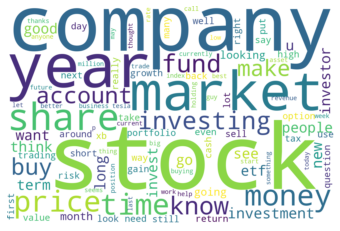

In [69]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=' '.join(count_df.words)

# Create the wordcloud object
wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Two grams Frequency

In [70]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 2)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary2

    return counts_df
counts_df2=count_2gram(df1['selftext'])
counts_df2.head(20)

,words,count
0,long term,927
1,stock market,455
2,roth ira,394
3,index fund,370
4,next year,339
5,market cap,304
6,short term,301
7,stock price,285
8,interest rate,258
9,mutual fund,238


In [80]:
fig = px.bar(counts_df2.head(10), x='words', y='count', title="Top 10 2-grams in Explain Like I'm Five")
fig.show()

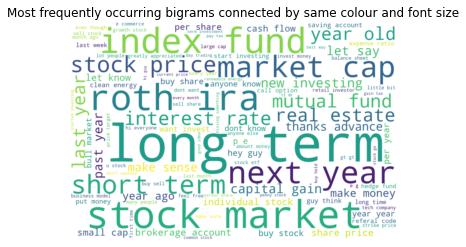

In [72]:
words_dict = dict(counts_df2.values)

wordCloud = WordCloud(max_words=200, height=1000, width=1500,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Three Gram Frequency

In [73]:
def count_3gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    esBigrams = ngrams(all_words, 3)
    counts = collections.Counter(esBigrams)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary3 = [' '.join(tup) for tup in counts_df.words]
    counts_df.words=dictionary3

    return counts_df
counts_df3=count_3gram(df1['selftext'])
counts_df3.head(20)

,words,count
0,capital gain tax,67
1,long term investment,57
2,please let know,56
3,referal code earth,54
4,code earth rfewqt,54
5,earth rfewqt use,54
6,rfewqt use code,54
7,use code eharth,54
8,code eharth referal,54
9,eharth referal code,54


### Try Markov Chain to generate synthetic text

In [27]:
import random
def markov_text(s, n, seed,length):
    '''
    Generates synthetic text according to an n-th order Markov model
    Parameter s: input string of real text
    Parameter n: integer n, the order of the model
    Parameter seed: the initial string that gets the Markov model started.
    Parameter length: integer, the size of the text to generate. default=100
    '''
    counts = count_ngrams(s, n+1)
    fake=seed
    for i in range(length):
        previous = fake[(-n):]
        # filter dict to keep only matching grams
        sub = {}
        for key in counts:
            if key[:-1] == previous: 
                sub[key] = counts[key]
    # convert to lists for use with random.choices
        choices = list(sub.keys())
        weights = [sub[key] for key in choices]
        new_gram = random.choices(choices, weights)[0]
        new_char = new_gram[-1]
        fake+=new_char
    return fake 

In [28]:
def count_ngrams(s,n=1):
    '''
    Counts the number of times each n-gram occurs in a string 's'
    Parameter s: input string
    Parameter n: input integer n to specify 'n-gram' that need to be count
    '''
    D={}
    #loop through s, untill there are not enough characters left forming n-gram
    for i in range(len(s)-(n-1)): 
        D[s[i:i+n]]=0 # initialize values to avoid key errors
    for i in range(len(s)-(n-1)):
        D[s[i:i+n]]+=1 #the value of each n-gram is their counts in s
    return D

{'to': 2, 'or': 1, 'rt': 1, 'oi': 1, 'is': 1, 'se': 1}

In [29]:
import itertools
all_words = list(itertools.chain(*Markov.str.split()))
s=' '.join(all_words)

In [30]:
#markov_text(s, n = 8, length = 400, seed = "roth ira")

'roth ira goal plan reading strong found lucrative sibling poverty looking anyway shoot hole plan buy home area dc md va mean definitely wanna live home parent rent freedom real story family three year living expensive business school buddy health care working lt hr week commsec doesnt really though net worth working anything time goal mine dont really help others math doesnt show still scary hell everythi'

In [31]:
#markov_text(s, n = 10, length = 400, seed = "healthcare")

'healthcare pretty important part plan plan stop making interest earnings per share portfolio etc anyone done synthetic mortgage bought around dollar instead assuming market expense asset hsa set work plan continue max ira reduce agi thus monthly loan payment maximizing net worth best case scenario ef investor forced sell stock low price market feel free point thanks g hi guy usa looking sustainable withdraw'

### Check the content of most frequent words/2-grams

In [74]:
import numpy as np
index=df1[df1['selftext'].str.contains("long term")].index
index

Int64Index([   12,    22,   100,   101,   106,   118,   152,   157,   160,
              164,
            ...
            13031, 13053, 13176, 13491, 13495, 13496, 13522, 14836, 14908,
            14943],
           dtype='int64', length=688)

In [86]:
df.iloc[index]['selftext'][13176]

"Hey guys I'm a pretty new investor, just started a month ago, up about 2k with a small initial investment of 5k, I've been moving most of my profits out of my robinhood and slowly building a schwab retirement account that I don't intend to touch for some decades, in this account, I'm focusing on dividends, tech, semiconductors and recently debating to invest in some ETFs for the long-term.\n\nI really love to invest in tech, robotics, AI, renewable etc.\n\nMy choices (that I've found so far are ) MOON, HACK, BOTZ. If anybody has some insight on these or potentially some other ETFs that hover around these sectors I would be very grateful!\n\n&amp;#x200B;\n\nTLDR: MOON, HACK, BOTZ or ???"

[12]:So, rather then following his trade, are there perhaps other Japanese stocks that are good long-term investments?

[100]: If I’m willing to hold qqq long term, why not buy some tqqq as well?

[118]:I have made SPY (broad S&amp;P 500) a large part of my portfolio for long term investing, but is there any reason not to go with a leveraged ETF like UPRO instead?

[164]:I believe the basic idea of index funds is investing and leaving it alone then letting it grow for the long term, but thats under the assumption the market will keep growing right? 

[13176]:I'm focusing on dividends, tech, semiconductors and recently debating to invest in some ETFs for the long-term.

[17410]: If you are visiting xyz.com, make sure you are on the same domain when submitting valuable info or before making a payment (during payment you may be officially redirected)

[637]:If the teacher opens up breakout rooms, wait just a bit longer just to make sure there isn't any more things they want to say.

In [87]:
index1=df1[df1['selftext'].str.contains("stock market")].index
index1

Int64Index([   24,   132,   143,   164,   311,   367,   379,   419,   639,
              665,
            ...
            12881, 12887, 12909, 12924, 12952, 13036, 13486, 13661, 13664,
            14366],
           dtype='int64', length=369)

In [98]:
df.iloc[index1]['selftext'][12887]

'Been following the "Bogle" method since I read about it 5 years ago, but I feel like I\'ve been cheating with using all target date funds. We\'ve worked very hard and I now believe that my wife and I are at a point where tax advantages matter, we probably can reduce expense\'s by moving out of target funds, and we have ~$100k extra in a HYSA that *should* be invested. This amount is outside of our 6 month emergency fund or any spending plans of the next 2 years.\n\n**Overview of current situation:**\n\n* Only debt is ~$400k home mortgage 30yr. at 2.99% (new construction home purchased 2 years ago and now valued at ~$650k).\n\n* Both maxing out 401k\'s and IRA\'s with additional $ saved each month.\n\n* Both 30 years of age with secure jobs in the tech industry, established companies, room for growth, and translatable skill sets should something unforeseen happen.\n\n* No kids, but plan to start trying for a kid next year.\n\n* Goal of a lake house purchase ($400k or less) in next deca

[143]: So how does this QE money flow to the stock market and other assets? Do people actually borrow money from banks now to use for stock purchases?

[367]:If it is possible that the whole banking system has no more paper for the citizens to use, which company can be used for managing, producing or handling the digital assets or transactions? I would really be interested in investing in some of those IT-companies, because they could bring some good return.

[639]:Is there a good reason to have 50% fixed income allocation if I am younger and have 30 years to retirement?  \n1. Why do people advocate for 100% equities in this crazy overpriced market? \n\nTL;DR: Very credible investing book from 70s says to hold large proportion fixed income, why do people advocate equities in today\'s current market conditions?'

In [99]:
index2=df1[df1['selftext'].str.contains("roth ira")].index
index2

Int64Index([  102,   116,   160,   225,   228,   388,   416,   461,   481,
              482,
            ...
            11880, 12066, 12583, 12588, 12799, 12887, 12960, 12969, 12989,
            13046],
           dtype='int64', length=259)

In [106]:
df.iloc[index2]['selftext'][228]

' Vti-50 Vxus-20 Arkk-15 Arkw-10 Komp-5  Should I add in a dividend etf? If so, what ur recommendations or tips?  In my Roth Ira. I’m looking for something with steady growth over the years or should I add in an individual like AT&amp;T?  Do Dividend ETFs have high growth or volatility like Arkk? Any suggestions?'

[116]:Is there a beginner way to determine what my cost basis is and if I'll be taxed or not upon converting to a Roth? Is there somewhere in my Vanguard account where I can determine if the funds in my Traditional IRA have been taxed yet from when I rolled over funds from an employer 401(k) years ago?"
 

[842]: I’m considering a withdrawal through this law change and would deposit the $ into a taxable brokerage account for flexibility in investing opportunities, bigger emerg fund (I am at a start up), debt pay down, etc. \n\nWhat am I missing? I have read the articles saying don’t do this, but they’re all predicated on the person squandering the money, not investing it.

In [134]:
index3=df1[df1['selftext'].str.contains("index fund")].index
index3 #Vanguard index fund account

Int64Index([ 26,  86, 153, 202, 213, 223, 252, 273, 280, 294, 299, 416, 453,
            458, 494, 504, 567, 588, 599, 603, 645, 828, 931, 938, 963],
           dtype='int64')

In [138]:
df.iloc[index3]['selftext'][599]

"Other than what I have in checking (for monthly and emergency expenses), I have the rest of my savings in a High Yield Savings Account. I have multiples because the insurance limit is $250,000. However, they are collecting at only 0.80% APR at the moment so I am considering transferring them into my existing Vanguard index fund account. \n\nMy goals and stats about me: \n\n1. My checking covers my current monthly expenses ($1500) and a short term emergency buffer ($1000)\n2. I will need to withdraw $50,000 in the next 2 to 5 years to purchase a house if the mortgage rate is low enough. If not, I buy in cash \n3. I aim to passively grow my savings (1m) and I will NOT touch this money for a very very very long time. As I am quite tech savvy, I will be checking this periodically and do not need a finance manager\n4. I have maxed out my 403(b) and Roth IRA account every year. I will also not touch this for a very very very long time. \n5. I have started a Vanguard index fund account ($300

[828]:Both books were great to get me started off right with FI. Bogle convinced me on the merit of index funds and Collins laid out the path to FI in very broad stokes. \n\nNow I’ve paid off all my debt, bought a house, and have been getting my 401k match and investing it in US stock index funds.Now that my debt is paid off and I’m done saving for a house, I have a lot more to invest and don’t have a comprehensive strategy for what buckets to put my money into and in what order. \n\nIn addition to learning more about FI investment strategies and order of operations with investment accounts, I’d like to gain more literacy on things like Roth conversions/ backdoor Roths.

In [140]:
index4=df1[df1['selftext'].str.contains("stock market")].index
index4

Int64Index([  8,  19,  77,  86, 180, 202, 249, 252, 273, 319, 370, 467, 495,
            499, 542, 545, 547, 565, 567, 588, 595, 643, 798, 843, 912, 917,
            944, 945],
           dtype='int64')

In [154]:
df.iloc[index4]['selftext'][643]

'Hey folks, just a background on myself:\n\nGrew up in a poor family.  Got myself to college with loans in STEM degree and have grinded my way to a well paying job.  i’ve always paid off all my debts as soon as i can and i always save up money on a roth and 401k every month.  i lived very frugally.  Bought a small house in my late 20s after saving up for a down payment.\n\nEventually got married to someone with 200k  (7% interest) medical school debt.  we fought occasionally about finances with my mortgage and her loans - but eventually she got a decent job and we had an aggressive plan to pay it all off in 4 years and we did it but living frugally and paying aggressively.  Mid 30s now with maybe 300K in retirement, 20k maybe in our banks but at least we were free of the medical school debt.\n\nthen we had a kid.  she quit her job.  finances went even harder now and we fight all the time - kids will ruin that connection between two folks quick.  we weren’t happy\n\nthen 2020 was a weir

Late 20s, know nothing about stock market investing 

[843]:1. Thoughts on the above for 401(k)/IRA?\n2. Should I keep my taxable accounts in line with my tax-preferred accounts?\n3. Should I even purchase bonds at my age? And if I do, would something like 5% even mean much in a total bond fund?   \n \n\nI'm not an expert in investing, so that's why I'm looking for this advice. I could be overlooking something that one of you may pick up on quickly. I've just focused on minimizing costs and investing money that I've had leftover.

[542]:Is anyone else struggling what to do with their FI/RE money? Either in terms of how to spend/invest or better utilize it? 

In [148]:
index5=df1[df1['selftext'].str.contains("time")].index
index5

Int64Index([  4,   8,   9,  15,  18,  26,  27,  29,  36,  52,
            ...
            955, 962, 965, 966, 972, 974, 976, 981, 983, 992],
           dtype='int64', length=165)

In [150]:
df.iloc[index5]['selftext'][18]

"For the better part of 2 years now I've been lurking about and taking the subreddit's lessons towards making small improvements to my (and my wife's) financial discipline and situation. We've made some real small-time progress and I'm very proud of us, but we've constantly struggled to grow our savings account before something wipes it out. We've yo-yo'ed between 1-2 months emergency funds during this process constantly, while making some progress on debts. So overall, forward motion!\n\nFlash forward to today. Due to the sad reality of Covid-19 America,  I'm furloughed and her hours have been cut in half. I've been drawing unemployment since my furlough began (first time ever in my life) and she just got her first unemployment deposits today. Due to the CARES act, we're making significantly more income in this situation than we were while working. As a result, we've been banking a lot of extra cash (for us).\n\nToday we surpassed the largest amount we've ever saved up before (previou